<a href="https://colab.research.google.com/github/yoneda-kg/sparce/blob/main/ISTA%E3%83%8E%E3%82%A4%E3%82%BA%E7%84%A1%E3%81%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://gist.github.com/agramfort/ac52a57dc6551138e89b


agramfort/lasso_ista_fista.py

https://maea2.hatenablog.com/entry/2017/03/06/235519

はてなblog

In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import random

In [ ]:
M= 15 # 観測ベクトル次元
N= 30 # 元信号ベクトル次元
# 観測行列を生成
A=np.random.randn(M,N)
# スパースな原信号ベクトルを生成
x0 = np.random.rand(N)
x0[x0 < 0.9] = 0
#観測ベクトルを生成
y=A.dot(x0)
A_T=A.transpose()
Lambda=0.5

In [ ]:
def soft_thresh(x, Lambda):
    return np.sign(x) * np.maximum(np.abs(x) - Lambda, 0.)

In [ ]:
def ista(A, y, Lambda, maxit):
    x = np.zeros(A.shape[1])
    L=np.linalg.norm(A_T.dot(A),ord=2)/Lambda # Lipschitz constant
    for _ in range(maxit):
        x = soft_thresh(x + np.dot(A.T, y - A.dot(x)) / L, Lambda / L)
    return x

In [ ]:
maxit=3000
x_ista=ista(A, y, Lambda, maxit)

<StemContainer object of 3 artists>

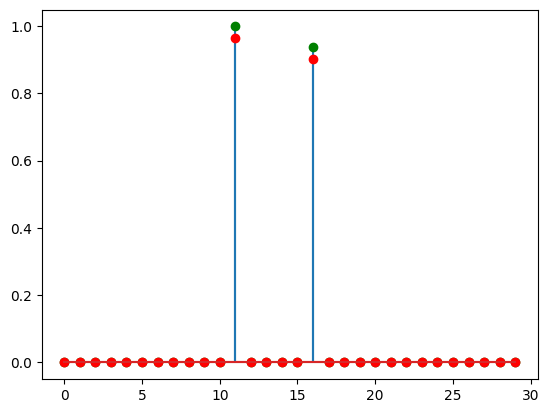

In [ ]:
plt.figure()
plt.stem(x0, markerfmt='go')
plt.stem(x_ista, markerfmt='ro')